<a href="https://colab.research.google.com/github/abriciof/introducao-aprendizado-maquinas/blob/main/Classifica%C3%A7%C3%A3o_de_Medicamentos_IAM_Parcial_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Medicamentos


> IEE067 - Introdução à Aprendizagem de Máquinas
> * Fabrício da Costa Guimarães - 21950515
> * Isabella Negrão Mendes - 

## Importando Bibliotecas

In [104]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Aprendizagem de Máquinas
import sklearn as sk
from sklearn import preprocessing

# Classificadores
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Seleção de Modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

## Conhecendo a base de dados

### Lendo csv

In [105]:
df = pd.read_csv("https://raw.githubusercontent.com/abriciof/introducao-aprendizado-maquinas/main/drug.csv")

In [106]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Plotando informações

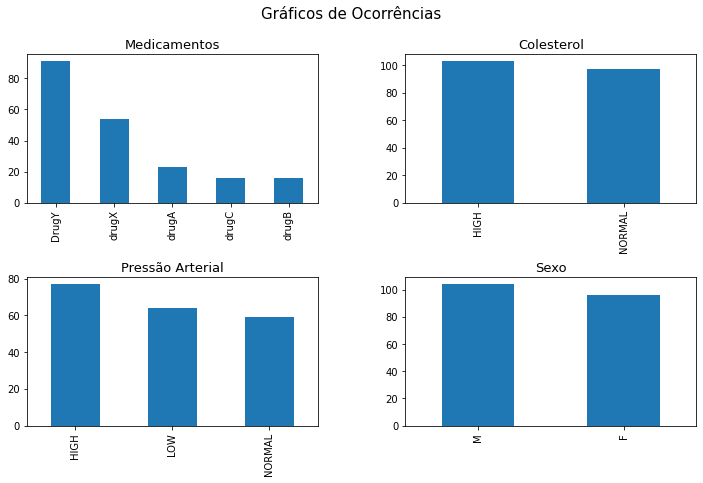

In [107]:
plt.figure(figsize = ((12, 6)))
plt.subplot(2, 2, 1)
df["Drug"].value_counts().plot(kind="bar");
plt.title("Medicamentos", fontsize = 13)
plt.subplot(2, 2, 2)
df["Cholesterol"].value_counts().plot(kind="bar");
plt.title("Colesterol", fontsize = 13)
plt.subplot(2, 2, 3)
df["BP"].value_counts().plot(kind="bar");
plt.title("Pressão Arterial", fontsize = 13)
plt.subplot(2, 2, 4)
df["Sex"].value_counts().plot(kind="bar");
plt.title("Sexo", fontsize = 13)
plt.suptitle("Gráficos de Ocorrências", fontsize = 15)
plt.subplots_adjust(left=0.125, bottom=0.01, right=0.9, top=0.87, wspace=0.3, hspace=0.5)
plt.show()

In [108]:
label_encoder = preprocessing.LabelEncoder()
df['Drug'] = label_encoder.fit_transform(df['Drug'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


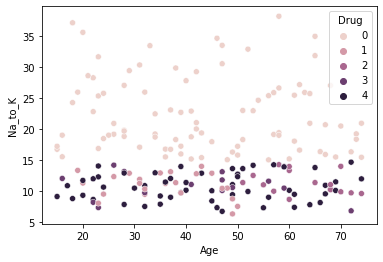

In [109]:
sns.scatterplot('Age', 'Na_to_K',
                hue='Drug',  data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


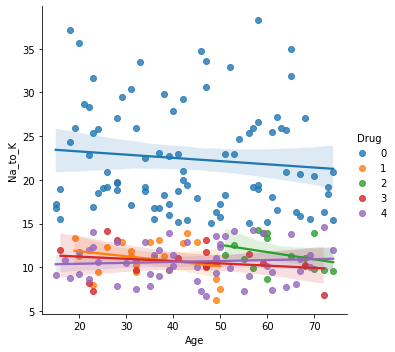

In [110]:
sns.lmplot('Age', 'Na_to_K',
             hue='Drug', data=df)

## Validação Cruzada

### Separando os Medicamentos Labels das características dos pacientes

In [111]:
X = df.drop("Drug", axis=1)
Y = df["Drug"]

### Classificadores

In [112]:
models = {"MultinomialNB": MultinomialNB(),
          "BernoulliNB": BernoulliNB(),
          "ComplementNB": ComplementNB(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "NearestCentroid": NearestCentroid(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "LinearSVC": LinearSVC() 
          }

### Porcentagem: 70% treino / 30% teste

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


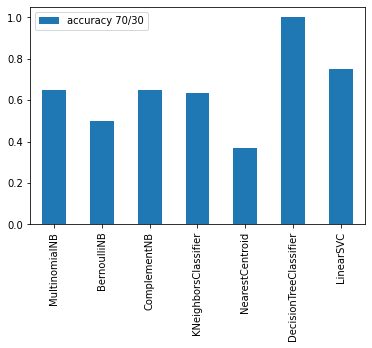

In [113]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

grafico = pd.DataFrame(model_scores, index=[f"accuracy 70/30"])
grafico.T.plot.bar()



## KFold para K = {4, 6, 8, 10}

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

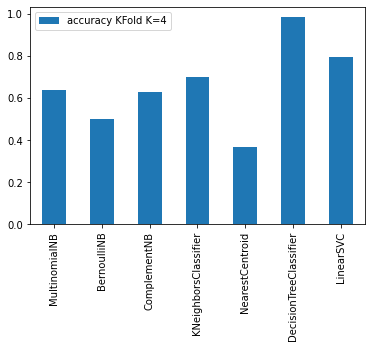

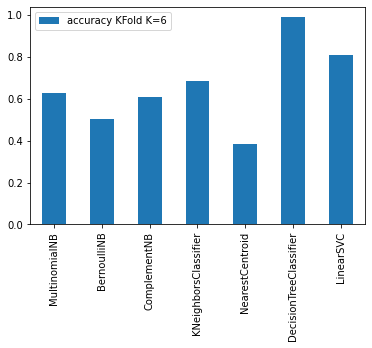

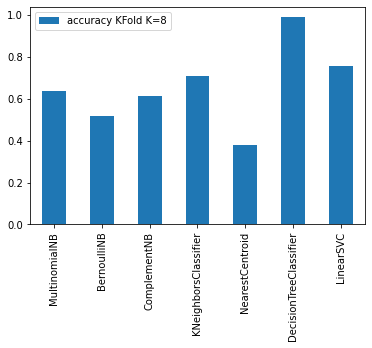

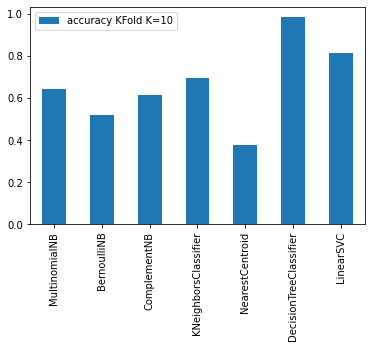

In [114]:
folds = [4,6,8,10]
for f in folds:
    kf = KFold(n_splits=f)
    model_total = {}
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train = pd.DataFrame([X.loc[a] for a in train_index])
        X_test = pd.DataFrame([X.loc[a] for a in test_index])
        y_train = pd.DataFrame([Y.loc[a] for a in train_index])
        y_test = pd.DataFrame([Y.loc[a] for a in test_index])
        np.random.seed(42)
        model_scores = {}
        for name, model in models.items():
            model.fit(X_train, y_train)
            model_scores[name] = model.score(X_test, y_test)
        model_total[i] = model_scores

    result = {}
    for key in model_total[0].keys(): result[key] = 0
    for key in model_total[0].keys():
        for a,b in model_total.items():
            result[key] +=b[key]
    for key in model_total[0].keys(): result[key] = result[key]/len(model_total)
    grafico = pd.DataFrame(result, index=[f"accuracy KFold K={f}"])
    grafico.T.plot.bar()

### Leave One Out

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

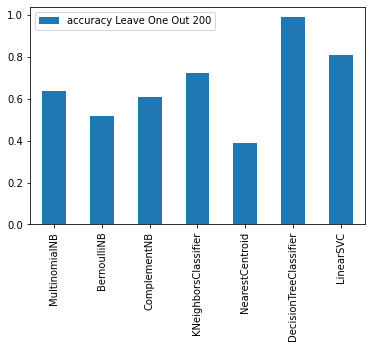

In [115]:
loo = LeaveOneOut()
loo.get_n_splits(X)
model_total = {}
for i, (train_index, test_index) in enumerate(loo.split(X)):
    X_train = pd.DataFrame([X.loc[a] for a in train_index])
    X_test = pd.DataFrame([X.loc[a] for a in test_index])
    y_train = pd.DataFrame([Y.loc[a] for a in train_index])
    y_test = pd.DataFrame([Y.loc[a] for a in test_index])
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        y_preds = model.predict(X_test)
    model_total[i] = model_scores

result = {}
for key in model_total[0].keys(): result[key] = 0
for key in model_total[0].keys():
    for a,b in model_total.items():
        result[key] +=b[key]
for key in model_total[0].keys(): result[key] = result[key]/len(model_total)
grafico = pd.DataFrame(result, index=[f"accuracy Leave One Out 200"])
grafico.T.plot.bar()